In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import pickle
from IPython.core.display import display, HTML
from tqdm.notebook import tqdm
import glob
import csv


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pylab as plt
%matplotlib inline

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_colwidth", 5000)
pd.set_option("display.max_columns", 2000)


DATA_DIR = '../data/'

/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/3228527578.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
glob.glob(f"{DATA_DIR}*")

['../data/NYT_Russia_Ukraine.csv',
 '../data/Ukraine_troops.csv',
 '../data/Guardians_Russia_Ukraine.csv',
 '../data/Ukraine_war.csv',
 '../data/Russia_invade.csv',
 '../data/russian_invasion_of_ukraine.csv',
 '../data/Ukraine_nato.csv',
 '../data/Russian_troops.csv',
 '../data/StandWithUkraine.csv',
 '../data/Ukraine_border.csv',
 '../data/Russian_border_Ukraine.csv']

# Load data

In [3]:
data = {}
for arg in glob.glob(f"{DATA_DIR}*"):
    print(f"Process: {arg}")
    file_name = arg.split('/')[-1].split('.')[0].lower()
    
    try:
        tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
#                                skipfooter=1
#                                quoting=csv.QUOTE_MINIMAL
                              )
        
    except Exception as ex:
        print(f'ISSUE: {file_name}, {ex.args}')
        tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
                               skipfooter=1
#                                quoting=csv.QUOTE_MINIMAL
                              )
    
    print(f"Load: {tmp_data.shape}")
    display(HTML(tmp_data.head(2).to_html()))
    data[file_name] = tmp_data

Process: ../data/NYT_Russia_Ukraine.csv
Load: (219, 3)


Process: ../data/Ukraine_troops.csv
ISSUE: ukraine_troops, ('Error tokenizing data. C error: EOF inside string starting at row 154673',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 154674: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (154671, 29)


Process: ../data/Guardians_Russia_Ukraine.csv
Load: (188, 3)


Process: ../data/Ukraine_war.csv
ISSUE: ukraine_war, ('Error tokenizing data. C error: EOF inside string starting at row 138668',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 138669: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (138666, 29)


Process: ../data/Russia_invade.csv
ISSUE: russia_invade, ('Error tokenizing data. C error: EOF inside string starting at row 145848',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 145849: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (145846, 29)


Process: ../data/russian_invasion_of_ukraine.csv
Load: (253494, 8)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',


Process: ../data/Ukraine_nato.csv
ISSUE: ukraine_nato, ('Error tokenizing data. C error: EOF inside string starting at row 122516',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 122517: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (122514, 29)


Process: ../data/Russian_troops.csv
Load: (128405, 29)


Process: ../data/StandWithUkraine.csv
ISSUE: standwithukraine, ('Error tokenizing data. C error: EOF inside string starting at row 140617',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 140618: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (140615, 29)


Process: ../data/Ukraine_border.csv
ISSUE: ukraine_border, ('Error tokenizing data. C error: EOF inside string starting at row 143829',)


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_17252/1727033202.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tmp_data = pd.read_csv(arg, encoding='utf-8', on_bad_lines='warn',
Skipping line 143830: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


Load: (143827, 29)


Process: ../data/Russian_border_Ukraine.csv
Load: (53040, 29)


In [4]:
for arg, value in data.items():
    print(arg)
    print(value.columns)
    print(value.shape)

nyt_russia_ukraine
Index(['published', 'headlines', 'articles'], dtype='object')
(219, 3)
ukraine_troops
Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')
(154671, 29)
guardians_russia_ukraine
Index(['published', 'headlines', 'articles'], dtype='object')
(188, 3)
ukraine_war
Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentione

In [5]:
data.keys()

dict_keys(['nyt_russia_ukraine', 'ukraine_troops', 'guardians_russia_ukraine', 'ukraine_war', 'russia_invade', 'russian_invasion_of_ukraine', 'ukraine_nato', 'russian_troops', 'standwithukraine', 'ukraine_border', 'russian_border_ukraine'])

# Create datasets

In [6]:
import yaml
import json
import ast
from tqdm import tqdm

def load_json(string):
    try:
#         print(f"input: {string}")
        return ast.literal_eval(string)
    except Exception as ex:
        print(f"WRONG: {string}, {ex.args}")
    
    return None
    
tqdm.pandas()

In [7]:
data['nyt_russia_ukraine']['source'] = 'nyt'
data['guardians_russia_ukraine']['source'] = 'guardians'

In [8]:
data_real = pd.concat([data['nyt_russia_ukraine'],
                      data['guardians_russia_ukraine']],
                     axis=0, sort=False)
data_real['published'] = pd.to_datetime(data_real['published'])
data_real.shape

data_tweet = pd.concat([data['ukraine_troops'],
                      data['ukraine_war'],
                      data['russia_invade'],
                      data['ukraine_nato'],
                      data['russian_troops'],
                      data['standwithukraine'],
                      data['ukraine_border'],
                      data['russian_border_ukraine']],
                     axis=0, sort=False).drop(['_type', 'source', 'sourceUrl',
                                              'cashtags'], axis=1)
# parce dates and jsons in columns
data_tweet['date'] = pd.to_datetime(data_tweet['date'])
data_tweet['user'] = data_tweet['user'].progress_apply(load_json)
data_tweet['username'] = data_tweet['user'].apply(lambda x: x['username'])

data_tweet['inReplyToUser'] = data_tweet['inReplyToUser'].fillna('{}').progress_apply(load_json)
data_tweet['mentionedUsers'] = data_tweet['mentionedUsers'].fillna('{}').progress_apply(load_json)
data_tweet['quotedTweet'] = data_tweet['quotedTweet'].fillna('{}').progress_apply(load_json)

data_score = data['russian_invasion_of_ukraine'].copy()
data_score['timestamp'] = pd.to_datetime(data_score['timestamp'])
data_score.shape

(407, 4)

100%|████████████████████████████████████████████████| 1027584/1027584 [00:22<00:00, 45973.56it/s]


(253494, 8)

## Processing twitter data


In [9]:
# drop duplicates
data_tweet_clean = data_tweet.drop_duplicates(subset=['id'])

data_tweet_clean.drop(['user', 'inReplyToUser', 'mentionedUsers', 'quotedTweet'], axis=1).nunique()
data_tweet_clean.shape

url                 873019
date                622340
content             864252
renderedContent     842692
id                  873019
replyCount             653
retweetCount          1336
likeCount             2804
quoteCount             404
conversationId      659159
lang                    60
sourceLabel           2050
outlinks            188551
tcooutlinks         271118
media               102531
retweetedTweet           0
inReplyToTweetId    314144
coordinates           3703
place                 3545
hashtags            102529
Searh                    8
username            402380
dtype: int64

(873019, 26)

In [10]:
# select only EN lang
data_tweet_clean = data_tweet_clean.query("lang == 'en'")#.drop(['conversationId',
                                        #'tcooutlinks', 'coordinates', 'place', 'lang'], axis=1)

In [11]:
# get info from jsons
data_tweet_clean['replied_user'] = data_tweet_clean['inReplyToUser'].apply(lambda x: x['username']
                                                                              if 'username' in x else None)
data_tweet_clean['quoted_user'] = data_tweet_clean['quotedTweet'].apply(lambda x: x['user']['username']
                                                                              if 'user' in x else None)
data_tweet_clean['quoted_id'] = data_tweet_clean['quotedTweet'].apply(lambda x: x['id']
                                                                              if 'id' in x else None)
data_tweet_clean['mentioned_users'] = data_tweet_clean['mentionedUsers'].apply(lambda args: [x['username']
                                                                              if 'username' in x else None 
                                                                                for x in args])

In [12]:
data_tweet_clean.outlinks = data_tweet_clean.outlinks.fillna('[]').apply(ast.literal_eval)
data_tweet_clean.tcooutlinks = data_tweet_clean.tcooutlinks.fillna('[]').apply(ast.literal_eval)
data_tweet_clean.hashtags = data_tweet_clean.hashtags.fillna('[]').apply(ast.literal_eval)

In [13]:
data_tweet_clean.drop(['user', 'inReplyToUser', 'mentionedUsers', 
                       'mentioned_users', 'quotedTweet', 'outlinks', 'tcooutlinks', 'hashtags'], axis=1).nunique()

url                 787029
date                585231
content             782193
renderedContent     765695
id                  787029
replyCount             644
retweetCount          1304
likeCount             2710
quoteCount             398
conversationId      586028
lang                     1
sourceLabel           1880
media                85138
retweetedTweet           0
inReplyToTweetId    295763
coordinates           3091
place                 2971
Searh                    8
username            364264
replied_user        146362
quoted_user          21820
quoted_id            53178
dtype: int64

In [14]:
data_tweet_clean.isna().sum()

url                      0
date                     0
content                  0
renderedContent          0
id                       0
user                     0
replyCount               0
retweetCount             0
likeCount                0
quoteCount               0
conversationId           0
lang                     0
sourceLabel              0
outlinks                 0
tcooutlinks              0
media               699383
retweetedTweet      787029
quotedTweet              0
inReplyToTweetId    414686
inReplyToUser            0
mentionedUsers           0
coordinates         776748
place               776748
hashtags                 0
Searh                    0
username                 0
replied_user        414686
quoted_user         711230
quoted_id           711230
mentioned_users          0
dtype: int64

In [40]:
data_tweet_clean.sample(5)

url  \
14946    https://twitter.com/LilyMancester/status/1499515788478320642   
60705         https://twitter.com/rpangell/status/1495905709808144391   
54398  https://twitter.com/Scuttlebutter01/status/1496322890727587841   
75732    https://twitter.com/Erik_Robbins_/status/1494809360219787264   
79428  https://twitter.com/JansenKornelius/status/1494709336156819465   

                           date  \
14946 2022-03-03 22:43:18+00:00   
60705 2022-02-21 23:38:08+00:00   
54398 2022-02-23 03:15:52+00:00   
75732 2022-02-18 23:01:38+00:00   
79428 2022-02-18 16:24:10+00:00   

                                                                                                                                                                                                                                                                                                                              content  \
14946                                                            Putin has shown than if he can't take #Ukraine , he will level it. No matter the cost to civilians. In his own country and in the sovereign nation he has invaded.  The war crimes carried out in the Kremlin name are barbaric and unacceptable. #StandWithUkraine️   
60705                                                                                                  Peace is the only solution.  If anyone is harmed by Russia it will be a war crime and crime against hunanity. President Volodymyr Zelenskiy on Saturday said Ukraine would not respond to provocations https://t.co/3vZXezbQZ9   
54398                                   @stephendziedzic @dylanwelch Disrespectful &amp; abusive? Hope the "Spy Chief" survives. Belarus is in bed with them but what about Poland, Slovakia, Hungary, Romania &amp; Moldova who'll all have a "border" with Russia if Putin does indeed remove Ukraine's "sovereignty" &amp; invade?   
75732                                @shawngorham Russia + Germany = 💩 on 🇺🇸 so we needed a way to strain their relationship. Germany is a NATO country so threatening to bring Ukraine (Russia’s BFF) into NATO is causing a rift between Russia and Germany and making 🇺🇸 😊 again. Basically it’s all about 💵 like everything else.   
79428  This is indeed a very balanced and informed article on the #RussiaCrisis that, after laying out both sides, makes it clear that the issue is not NATO but Russia's desire to dominate Ukraine.\n\nToo bad @RichardHanania either didn't read it or, more likely, doesn't care. https://t.co/huO4LREOKD https://t.co/8XLuEEKmf1   

                                                                                                                                                                                                                                                                                                                          renderedContent  \
14946                                                                Putin has shown than if he can't take #Ukraine , he will level it. No matter the cost to civilians. In his own country and in the sovereign nation he has invaded.  The war crimes carried out in the Kremlin name are barbaric and unacceptable. #StandWithUkraine️   
60705                                                                                                  Peace is the only solution.  If anyone is harmed by Russia it will be a war crime and crime against hunanity. President Volodymyr Zelenskiy on Saturday said Ukraine would not respond to provocations twitter.com/Reuters/status…   
54398                                       @stephendziedzic @dylanwelch Disrespectful &amp; abusive? Hope the "Spy Chief" survives. Belarus is in bed with them but what about Poland, Slovakia, Hungary, Romania &amp; Moldova who'll all have a "border" with Russia if Putin does indeed remove Ukraine's "sovereignty" &amp; invade?   
75732                                    @shawngorham Russia + Germany = 💩 on 🇺🇸 so we needed a way to strain

In [16]:
data_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787029 entries, 0 to 53039
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   url               787029 non-null  object             
 1   date              787029 non-null  datetime64[ns, UTC]
 2   content           787029 non-null  object             
 3   renderedContent   787029 non-null  object             
 4   id                787029 non-null  int64              
 5   user              787029 non-null  object             
 6   replyCount        787029 non-null  int64              
 7   retweetCount      787029 non-null  int64              
 8   likeCount         787029 non-null  int64              
 9   quoteCount        787029 non-null  int64              
 10  conversationId    787029 non-null  int64              
 11  lang              787029 non-null  object             
 12  sourceLabel       787029 non-null  object    

In [50]:
import re

data_tweet_clean['urls'] = data_tweet_clean['outlinks'].progress_apply(lambda arg: [re.sub(r'^www.', '', 
                                                                                  url.split('://')[-1].split('/')[0].split(':')[0])
                                                    for url in (arg or [])])


100%|█████████████████████████████████████████████████| 787029/787029 [00:01<00:00, 432999.23it/s]


https://stackoverflow.com/


### Save data

In [61]:
# for arg in range(data_tweet_clean.shape[0] // 50000):
#     pickle.dump(data_tweet_clean.iloc[(arg * 50000):((arg + 1) * 50000),
#                                     ], open(f'data_clean_{arg}.pkl', 'wb'))

In [56]:
import pickle

pickle.dump(data_tweet_clean, open('data_clean.pkl', 'wb'))
pickle.dump((data_real, data_tweet, data_score), open('data.pkl', 'wb'))

## Subset selection

In [18]:
data_tweet_clean.sample(1)

url  \
54384  https://twitter.com/CreoleTargeted/status/1496306601065697291   

                           date  \
54384 2022-02-23 02:11:08+00:00   

                                                                                              content  \
54384  Watch "Russian Troops FLOOD into Ukraine on Putin's Orders" on YouTube https://t.co/Jhgc8imbSq   

                                                                                   renderedContent  \
54384  Watch "Russian Troops FLOOD into Ukraine on Putin's Orders" on YouTube youtu.be/zRZnaKTTrE8   

                        id  \
54384  1496306601065697291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          user  \
54384  {'_type': 'snscrape.modules.twitter.User', 'username': 'CreoleTargeted', 'id': 1364658468695793671, 'displayname': 'Targeted Creole', 'description': 'My name is Candy Grandpre. #TargetedIndividual #WritingCommunity

ko-fi.com/targetedcreole

#BuyMeACoffee 

#Homeless & trying to survive. Thank you.', 'rawDescription': 'My name is Candy Grandpre. #TargetedIndividual #WritingCommunity

https://t.co/nyTkNbkPj3

#BuyMeACoffee 

#Homeless & trying to survive. Thank you.', 'descriptionUrls': [{'text': 'ko-fi.com/targetedcreole', 'url': 'http://ko-fi.com/targetedcreole', 'tcourl': 'https://t.co/nyTkNbkPj3', 'indices': [66, 89]}], 'verified': False, 'created': '2021-02-24T19:29:01+00:00', 'followersCount': 544, 'friendsCount': 523, 'statusesCount': 37058, 'favouritesCount': 28165, 'listedCount': 0, 'mediaCount': 2502, 'location': 'Running from Gang Stalking', 'protected': False, 'linkUrl': 'https://gangstalkedcreoleauthor.blogspot.com/?m=0', 'linkTcourl': 'https://t.co/jfEyjLGk11', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1485830307655962628/WmhBVkpB_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1364658468695793671/1637518994', 'label': None, 'url': 'https://twitter.com/CreoleTargeted'}   

       replyCount  retweetCount  likeCount  quoteCount       conversationId  \
54384           0             0          0           0  1496306601065697291   

      lang      sourceLabel                        outlinks  \
54384   en  Twitter Web App  [https://youtu.be/zRZnaKTTrE8]   

                     tcooutlinks media  retweetedTweet quotedTweet  \
54384  [https://t.co/Jhgc8imbSq]   NaN             NaN          {}   

       inReplyToTweetId inReplyToUser mentionedUsers coordinates place  \
54384               NaN            {}             {}         NaN   NaN   

      hashtags           Searh        username replied_user quoted_user  \
54384       []  Russian troops  CreoleTargeted         None        None   

       quoted_id mentioned_users  
54384        NaN              []

In [ ]:
# outlinks top 100 
# hashtags top 100
# username top 100

In [53]:
hashtags = pd.DataFrame({'hashtag':[arg for args in data_tweet_clean.hashtags 
               for arg in args ]}).value_counts().reset_index(name='count')
hashtags.to_csv('hashtag.csv', index=False)

In [39]:
usernames = data_tweet_clean.username.value_counts().reset_index()
usernames_result = pd.concat([usernames.head(2000),
           usernames[usernames.username < 25].sample(6000)],
          axis=0, sort=False)
                             
usernames_result = usernames_result['index'].values
len(usernames_result), data_tweet_clean[data_tweet_clean.username.isin(usernames_result)].shape

(8000, (117110, 30))

In [38]:
usernames.head(2000).tail(1)

index  username
1999  tdpel        25

In [54]:
urls = pd.DataFrame({'url':[arg for args in data_tweet_clean[data_tweet_clean.username.isin(usernames_result)].urls 
               for arg in args ]}).value_counts().reset_index(name='count')
urls.head(100).to_csv('urls.csv', index=False)

In [55]:
pickle.dump(data_tweet_clean[data_tweet_clean.username.isin(usernames_result)], 
            open('data_filter.pkl', 'wb'))


## LDA

In [2]:
import pickle

data_tweet_clean = pickle.load(open('data_clean.pkl', 'rb'))
data_tweet_clean.shape

(787029, 30)

In [28]:
data_tweet_clean.sample(1)

url  \
7913  https://twitter.com/cw_palmer/status/1499751846591836161   

                          date  \
7913 2022-03-04 14:21:18+00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                             content  \
7913  @BonsaiBrain @ejvandermeulen @RussianEmbassy @mfa_russia @RusEmbUSA @RusembUkraine @RussiaUN @BBCWorld @ftworldnews @REESOxford @RT_com @guardian @MailOnline So dumb. When was the last time a NATO state invaded another country to colonize? Countries willingly join NATO (Nato learn and move on )\n\nWhy?\nTo defend against countries wanting to actually invade and colonize now, aka, Russia (reverting back to 1980)   

                                                                                                                                                                                                                                                                                                                                                                                                                     renderedContent  \
7913  @BonsaiBrain @ejvandermeulen @RussianEmbassy @mfa_russia @RusEmbUSA @RusembUkraine @RussiaUN @BBCWorld @ftworldnews @REESOxford @RT_com @guardian @MailOnline So dumb. When was the last time a NATO state invaded another country to colonize? Countries willingly join NATO (Nato learn and move on )\n\nWhy?\nTo defend against countries wanting to actually invade and colonize now, aka, Russia (reverting back to 1980)   

                       id  \
7913  1499751846591836161   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   user  \
7913  {'_type': 'snscrape.modules.twitter.User', 'username': 'cw_palmer', 'id': 1499327456758669313, 'displayname': 'Charles William', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2022-03-03T10:15:06+00:00', 'followersCount': 0, 'friendsCount': 9, 'statusesCount': 35, 'favouritesCount': 16, 'listedCount': 0, 'mediaCount': 0, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499327501209853957/njr_9YcU_normal.png', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/cw_palmer'}   

      replyCount  retweetCount  likeCount  quoteCount       conversationId  \
7913           0             0          0           0  1499735436373250049   

     lang      sourceLabel outlinks tcooutlinks media  retweetedTweet  \
7913   en  Twitter Web App      NaN         NaN   NaN             NaN   

     quotedTweet  inReplyToTweetId  \
7913          {}      1.499745e+18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
data_tweet_clean[data_tweet_clean.]

In [27]:
for arg in data_tweet_clean.username.value_counts().reset_index()['index']: print(arg)

Fidget02
trstdtravlr
AndyVermaut
trustdtravelr
TheAnswerYes
MarketsCafe
nigroeneveld
EuropeNews_b
SkyNetPlatform
Alexand65504397
NATOlizer
aw_journal2021
StopVladdyDaddy
Orgetorix
TheChestnutPost
PoliticalGeeker
ArvadaRadio
sawanswers
DHFabian1
SoizaDavid
ralakbar
auto_news_feed
Andy_Scollick
ZyiteGadgets
EuromaidanPR
WIONews
rich_outlaw
spriter99880
SandorDomjan1
Reuters
BanglaViral
Alexkennedy30
BistoshW
ThriftWallet
adabagcompany
MarQs__
travelerapps
GlasnostGone
Internl_Leaks
ReddySalina
NFLX1
sarang143u
tellmetimes
BerkleyBearNews
DailyMirror
NewsWorldPress
CyberRealms1
Diplomacy140
anews
dev_discourse
Knewz_Currently
SkyNews
ThomasMutschler
The5HbK
DiscoveryMosti
AbdulsatarBoch1
Freecitizen864
littlehawk463
UATV_en
NaijaNewsWire
jondknight
jeguru1
JrmChenu
IdeologyWars
CAdabag
spicoli_69
playitsafe_mr
TRTWorldNow
usasharenews
PaulaChertok
CGTNOfficial
walterlekh
PerhapsWriter
avsec_pro
TigerKnowz
Meekeelee011
srbija_eu
v_geuzen
MavkaSlavka
vicktop55
rogue_corq
NewsPlayerPlus
Apex

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
tweets_df = data_tweet_clean[['id', 'content']]

In [7]:
def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

#testing the function on a single sample for explaination
print(standardize_accented_chars('Sómě words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.'))
#standardizing accented characters for every row
tweets_df.Tweets=tweets_df.content.apply(standardize_accented_chars)

Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/1162673712.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tweets_df.Tweets=tweets_df.content.apply(standardize_accented_chars)


In [8]:
def get_number_of_urls(documents):
    print("{:.2f}% of documents contain urls".format(sum
            (documents.apply(lambda x:x.find('http'))>0)/len
            (documents)*100))
# Passing the 'Tweets' column of the dataframe as the argument
print(get_number_of_urls(tweets_df.content)) 

39.10% of documents contain urls
None


In [10]:
def remove_url(text):
    return re.sub(r'https?:\S*', '', text)
#testing the function on a single sample for explaination
                  
print(remove_url('using https://www.google.com/ as an example'))
#removing urls from every row
tweets_df.content=tweets_df.content.apply(remove_url)
print(get_number_of_urls(tweets_df.content)) 

using  as an example


/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/1770110056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df.content=tweets_df.content.apply(remove_url)


0.00% of documents contain urls
None


In [12]:
def expand_contractions(text):
    expanded_words = [] 
    try:
        for word in text.split():
            expanded_words.append(contractions.fix(word)) 
        return ' '.join(expanded_words)
    except Exception as ex:
        print(f"Wrong: {text}, {ex.args}")
        return None

#testing the function on a single sample for explaination
print(expand_contractions("Don't is same as do not"))
#expanding contractions for every row

tweets_df.content = tweets_df.content.apply(expand_contractions)

Do not is same as do not
Wrong: @ZelenskyyUa İ'M FROM AZERBAİJAN. We are want to StopWar and Russian troops leaves Ukraine, ('string index out of range',)
Wrong: A European war is raging in #Ukraine—and it isn’t likely to end soon. Why is the West trying to drag #Turkey into a war with #Russia?

By İbrahim Karagül @ibrahimkaragul

#USA #UK #Europe #UkraineRussiaWar #NATO #Realpolitik #geopolitics #geostrategy

, ('string index out of range',)
Wrong: Will war break out in #Ukraine, or will the West stoke a #Turkey-#Russia conflict? What sort of game is being played in the Black Sea?

By İbrahim Karagül @ibrahimkaragul

#USA #Europe #NATO #geopolitics #geostrategy

, ('string index out of range',)
Wrong: Will war break out in #Ukraine, or will the West stoke a #Turkey-#Russia conflict? What sort of game is being played in the Black Sea?

By İbrahim Karagül @ibrahimkaragul

#USA #Europe #NATO #geopolitics #geostrategy

, ('string index out of range',)
Wrong: All recent Turkey-enthusiasts 

/var/folders/zh/c52bnb1524xfzk_885ccgt4w0000gq/T/ipykernel_79169/642854990.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df.content=tweets_df.content.apply(expand_contractions)


In [13]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787029 entries, 0 to 53039
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       787029 non-null  int64 
 1   content  787022 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.0+ MB


In [14]:
tweets_df = tweets_df.dropna().copy()

In [17]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)
#testing the function on a single sample for explaination
print(remove_mentions_and_tags('Some random @abc and #def'))
#removing mentions and tags from every row
tweets_df.content=tweets_df.content.apply(remove_mentions_and_tags)

Some random  and 


In [18]:
def keep_only_alphabet(text):
    return re.sub(r'[^a-z]', ' ', text)
#testing the function on a single sample for explaination
print(keep_only_alphabet('Just a bit more $$processing required.Just a bit!!!'))
#for all the rows
tweets_df.content=tweets_df.content.apply(keep_only_alphabet)

 ust a bit more   processing required  ust a bit   


In [24]:
def remove_stopwords(text,nlp,custom_stop_words=None,
remove_small_tokens=True,min_len=2):
    # if custom stop words are provided, then add them to default stop words list
    if custom_stop_words:
        nlp.Defaults.stop_words |= custom_stop_words
    
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        
        if token.is_stop == False: 
            
            # if small tokens have to be removed, then select only those which are longer than the min_len 
            if remove_small_tokens:
                if len(token.text)>min_len:
                    filtered_sentence.append(token.text)
            else:
                filtered_sentence.append(token.text)
    # if after the stop word removal, words are still left in the sentence, then return the sentence as a string else return null 
    return ' '.join(filtered_sentence) if len(filtered_sentence)>0 else None
#creating a spaCy object. 

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
#removing stop-words and short words from every row
tweets_df.content=tweets_df.content.progress_apply(lambda x:remove_stopwords(x,nlp,{"elon","musk",}))


100%|████████████████████████████████████████████████████| 787022/787022 [39:56<00:00, 328.43it/s]


In [38]:
tweets_df = tweets_df.dropna().copy()

def lemmatize(text, nlp):
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
        lemmatized_text.append(token.lemma_)
    return ' '.join(lemmatized_text)

#testing the function on a single sample for explaination
print(lemmatize('Reading NLP blog is fun.' ,nlp ))

#Performing lemmatization on every row
tweets_df.content=tweets_df.content.progress_apply(lambda x:lemmatize(x,nlp))

read NLP blog be fun .


100%|████████████████████████████████████████████████████| 786681/786681 [23:36<00:00, 555.46it/s]


In [41]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
        # using the if condition because we introduced extra spaces during text cleaning
        if word!='':
            words.append(word)
    return words

#storing the generated tokens in a new column named 'words'
tweets_df['tokens']=tweets_df.content.apply(generate_tokens)

def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(tweets_df.tokens)
print(id2word)

def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus

#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tweets_df.tokens,id2word)
print(tweets_df.tokens[0])
print(corpus[0])

Dictionary<100896 unique tokens: ['kraine', 'ope', 'spread', 'troop', 'ugs']...>
0                                                                                                                           [ugs, ope, spread, ussian, kraine, troop]
0       [anti, war, protest, get, headline, erbia, good, relationship, kraine, ussia, county, support, erbian, territorial, integrity, osovo, pit, rthodox, hristian]
0                                                                                                                                                                  []
0                                                                                                                                                 [rhetoric, helpful]
0                                                                                                                     [utin, ussian, troop, try, stop, transfer, arm]
0                                                                                        

In [42]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=20,
 random_state=100,
 )

def get_lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];

    return pd.DataFrame(word_dict)
get_lda_topics(lda_model,10,10)

Topic # 01 Topic # 02 Topic # 03 Topic # 04 Topic # 05 Topic # 06  \
0     secure        amp        end     ussian       near       iden   
1    western      claim     launch     border       meet     kraine   
2      share      speak    promise     kraine      oscow   resident   
3     ground       plan      ready   krainian        say       utin   
4        fly     astern       aybe   military      ussia       rump   
5     create     update       roop      troop     ussian      ussia   
6      image       ould   northern       near     kraine        say   
7       turn   interest       word       tank       call  president   
8       play     remain     ecause    missile       late     leader   
9      plane       hile    attempt      ussia   exercise    elensky   

  Topic # 07 Topic # 08  Topic # 09  Topic # 10  
0      order     border      kraine       urope  
1    tension     kraine  aggression        news  
2     ussian      ussia         ith         big  
3     kraine     elarus      demand         ews  
4    ladimir     crisis        roll         lie  
5       utin      oland       oviet  propaganda  
6   escalate      close    withdraw       shoot  
7        ell       talk       unday     history  
8      sland  elarusian  withdrawal    activity  
9        ome     ussian         rom        orld

In [44]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

/Users/dzikr/mambaforge/envs/research/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/dzikr/mambaforge/envs/research/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.010754 -0.107959       1        1  21.488355
3      0.230392 -0.091390       2        1   8.918809
18    -0.147737 -0.056306       3        1   8.488272
13    -0.317873 -0.145678       4        1   7.383748
10     0.175249 -0.196856       5        1   6.018784
5     -0.077660 -0.337531       6        1   5.570921
15    -0.272957 -0.308670       7        1   5.365527
7      0.118764  0.032857       8        1   4.981694
16     0.043842  0.507936       9        1   3.048913
4      0.243522 -0.388132      10        1   2.957212
12     0.456427 -0.206417      11        1   2.948770
6     -0.019000  0.282094      12        1   2.904639
14     0.371170  0.248726      13        1   2.893589
1     -0.257542  0.447673      14        1   2.718596
19     0.256630  0.404670      15        1   2.702328
8     -0.241019  0.212402      16        1   2.659010
0     -0.520036 -0.054673      17        1   2.549836
9     -0.466259  0.217574      18        1   2.458465
17     0.508748  0.084151      19        1   2.188530
2     -0.073906 -0.544468      20        1   1.754002, topic_info=                Term           Freq          Total Category  logprob  loglift
382           border  644857.000000  644857.000000  Default  30.0000  30.0000
389              amp   86581.000000   86581.000000  Default  29.0000  29.0000
96              iden   93147.000000   93147.000000  Default  28.0000  28.0000
0             kraine  790186.000000  790186.000000  Default  27.0000  27.0000
5             ussian  354416.000000  354416.000000  Default  26.0000  26.0000
280            order   61550.000000   61550.000000  Default  25.0000  25.0000
105            ussia  299161.000000  299161.000000  Default  24.0000  24.0000
37              utin  133884.000000  133884.000000  Default  23.0000  23.0000
971             near   45431.000000   45431.000000  Default  22.0000  22.0000
540         resident   46850.000000   46850.000000  Default  21.0000  21.0000
237           people   57849.000000   57849.000000  Default  20.0000  20.0000
1004          elarus   33913.000000   33913.000000  Default  19.0000  19.0000
1319         buildup   40960.000000   40960.000000  Default  18.0000  18.0000
52               say   66286.000000   66286.000000  Default  17.0000  17.0000
11             force   55811.000000   55811.000000  Default  16.0000  16.0000
66               war   71590.000000   71590.000000  Default  15.0000  15.0000
53             urope   25877.000000   25877.000000  Default  14.0000  14.0000
4553         tension   26191.000000   26191.000000  Default  13.0000  13.0000
32          krainian   59665.000000   59665.000000  Default  12.0000  12.0000
428         military   73231.000000   73231.000000  Default  11.0000  11.0000
65              want   66022.000000   66022.000000  Default  10.0000  10.0000
315          ukraine   22313.000000   22313.000000  Default   9.0000   9.0000
1115            tate   20288.000000   20288.000000  Default   8.0000   8.0000
3              troop   67103.000000   67103.000000  Default   7.0000   7.0000
608            cross   26753.000000   26753.000000  Default   6.0000   6.0000
891           crisis   23677.000000   23677.000000  Default   5.0000   5.0000
113              end   17556.000000   17556.000000  Default   4.0000   4.0000
18           russian   19735.000000   19735.000000  Default   3.0000   3.0000
175          country   75365.000000   75365.000000  Default   2.0000   2.0000
653            guard   18965.000000   18965.000000  Default   1.0000   1.0000
114             join   30211.122925   30212.198648   Topic1  -4.3448   1.5376
836              ato   11220.634604   11221.710326   Topic1  -5.3353   1.5376
1256           amass   10158.674204   10159.750148   Topic1  -5.4347   1.5376
2500     sovereignty    6740.058624    6741.186475   Topic1  -5.8449   1.5375
1550             uba    5891.648251    

## Score file

In [70]:
data_score = data_score[data_score.score.str.len() < 5].copy()
data_score['score'] = data_score['score'].astype(int)

In [71]:
data_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65520 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      65520 non-null  object        
 1   score      65520 non-null  int64         
 2   id         65520 non-null  object        
 3   url        19401 non-null  object        
 4   comms_num  65520 non-null  float64       
 5   created    65520 non-null  float64       
 6   body       46126 non-null  object        
 7   timestamp  65519 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.5+ MB


<AxesSubplot: >

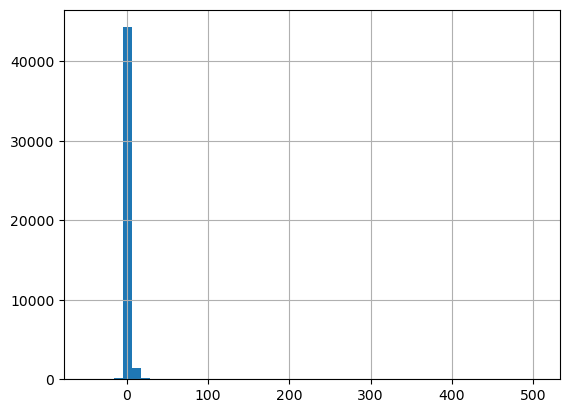

In [73]:
data_score.dropna(subset=['body']).score.hist(bins=50)

<AxesSubplot: >

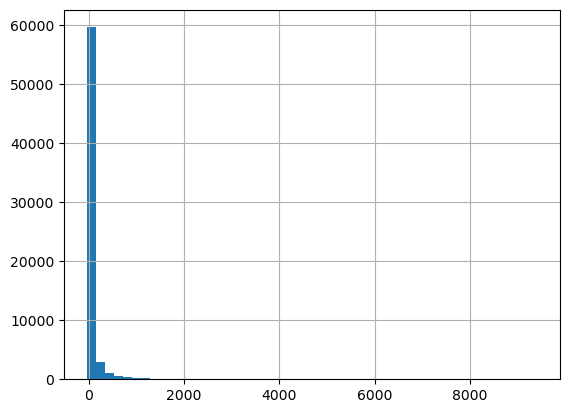

In [74]:
data_score.score.hist(bins=50)

In [75]:
data_score.dropna(subset=['body']).sample(10)

title  score       id  url  comms_num       created  \
8896   Comment      1  i24jlod  NaN        0.0  1.648248e+09   
35731  Comment      3  i4f31o0  NaN        0.0  1.649766e+09   
13572  Comment      1  i2hxpdn  NaN        0.0  1.648509e+09   
29673  Comment      1  i3wajl8  NaN        0.0  1.649424e+09   
6328   Comment     18  i1xa1kq  NaN        0.0  1.648126e+09   
35166  Comment      1  i4fb12g  NaN        0.0  1.649770e+09   
7473   Comment      1  i22im4w  NaN        0.0  1.648219e+09   
7461   Comment      1  i22ip9d  NaN        0.0  1.648219e+09   
2246   Comment      1  i1s9b8r  NaN        0.0  1.648037e+09   
62528  Comment      1  i70dmcw  NaN        0.0  1.651486e+09   

                                                                                                                                                                                                                                                                    body  \
8896                                                                                                                                                                                                                                                      big brain time   
35731                                                                                                                                                                                                              Someone said they were arming fuses for the artillery   
13572                                                                                                                                                                                                                             I think I missed my mark on the title.   
29673                                                                                                                                                                                                                                           I say, "No way, Sergey!"   
6328                                                                                                                                                                                                                                       Hard Johnson is way better :)   
35166                                                                                                                                                                                                                                             Yep Lavrov is a clown.   
7473                                                                                                                                                                                                                                                 How about Ethiopia?   
7461   You know what's the saddest part? Half of the people are still crying over it. Half of the people are still acting like it was the end of the world that areas that Hungary occupied years ago are now back to where they belong. My country is a f\*cking shame.   
2246                                                                                                                                  yea, market forces drunk on cheap gas\n\nwhy i support green energy/alternative/nuclear, fuck the dolphins think national security   
62528                                                                                                                                                                                                                                                        PMSL......🤣   

                timestamp  
8896  2022-03-25 22:47:48  
35731 2022-04-12 12:19:13  
13572 2022-03-28 23:08:03  
29673 2022-04-08 13:17:45  
6328  2022-03-24 12:48:39  
35166 2022-04-12 13:22:45  
7473  2022-03-25 14:35:16  
7461  2022-03-25 14:35:52  
2246  2022-03-23 12:06:01  
62528 2022-05-02 10:01:50